In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import os

In [2]:
columns = ('appId', 'name')
df_games_names = pd.concat([pd.read_csv('page{}_games.csv'.format(i), usecols=[1, 2], names=columns) for i in range(1, 6)])

df_games_names

,appId,name
0,271590,Grand Theft Auto V
1,1174180,Red Dead Redemption 2
2,1145360,Hades
3,715950,Divinity: Original Sin 2
4,391540,Undertale
...,...,...
11,1237970,Titanfall 2
12,584400,Sonic Mania
13,268500,XCOM 2
14,412830,STEINS;GATE


In [3]:
columns = ('appId', 'user', 'rating', 'hours')
df_reviews = pd.concat([pd.read_csv('page{}_reviews.csv'.format(i), usecols=[0, 3, 6, 7], names=columns) for i in range(1, 6)])

df_reviews

,appId,user,rating,hours
0,1145360,76561198059680994,1,48.3
1,1145360,lalaso123,1,23.2
2,1145360,76561198008088676,1,5.1
3,1145360,YogurtRed,1,11.4
4,1145360,76561199095470163,1,22.8
...,...,...,...,...
142106,809230,7.65612E+16,1,41.6
142107,809230,7.65612E+16,1,63.6
142108,809230,7.65612E+16,1,19.1
142109,809230,7.65612E+16,1,136.6


In [4]:
df_unique_reivews = df_reviews.drop_duplicates(subset=['appId', 'user'])
df_unique_reivews.shape

(877421, 4)

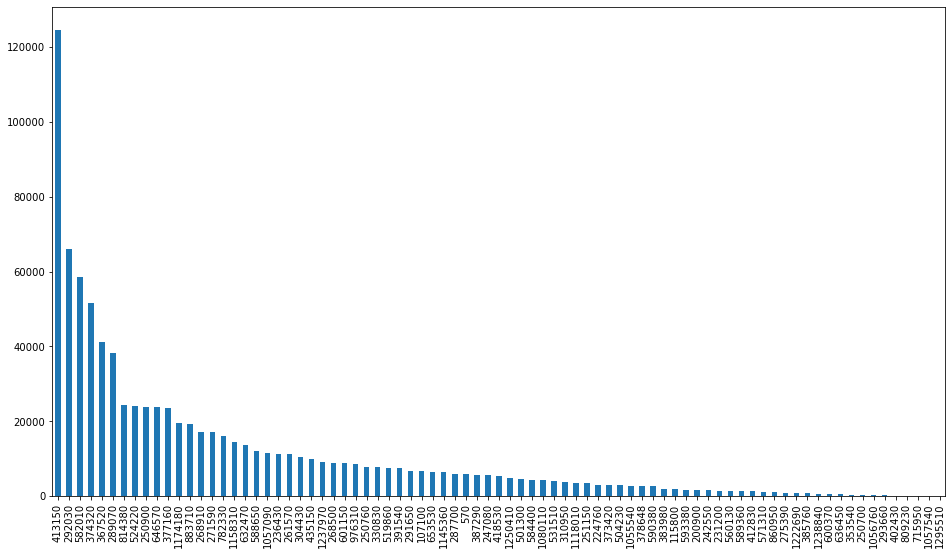

In [5]:
df_unique_reivews.appId.value_counts().plot(kind='bar', figsize=(16,9))

In [6]:
df_unique_reivews.appId.value_counts().describe()

count        81.000000
mean      10832.358025
std       18150.204895
min          44.000000
25%        1482.000000
50%        5489.000000
75%       11230.000000
max      124515.000000
Name: appId, dtype: float64

In [7]:
df_games_users = df_unique_reivews.pivot(
    index='appId',
    columns='user',
    values='rating'
).fillna(0)

df_games_users

user,NaN,#NAME?,----------------,----------k----------,-------l,-----Aria-----,----Werewolf---,---Ark---,---DMK---,---Oni---,...,zzzxggg,zzzxxxzzzxxx,zzzyim,zzzyrs,zzzzzzaaaaaaaaaaaaaaaaa,zzzzzzzzhou,zzzzzzzzzx_x,zzzzzzzzzzz111,zzzzzzzzzzz55555,zzzzzzzzzzzzzzzzzzz12
appId,,,,,,,,,,,,,,,,,,,,,
570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
107100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115800,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
200900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224760,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1222690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1237970,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1238840,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
hashmap = {appId: i for i, appId in enumerate(list(df_games_users.index))}
hashmap

{570: 0,
 107100: 1,
 115800: 2,
 200900: 3,
 224760: 4,
 231200: 5,
 236430: 6,
 242550: 7,
 247080: 8,
 250700: 9,
 250760: 10,
 250900: 11,
 251150: 12,
 261570: 13,
 268500: 14,
 268910: 15,
 271590: 16,
 275390: 17,
 287700: 18,
 289070: 19,
 291650: 20,
 292030: 21,
 293660: 22,
 304430: 23,
 310950: 24,
 330830: 25,
 353540: 26,
 367520: 27,
 373420: 28,
 374320: 29,
 377160: 30,
 378648: 31,
 383980: 32,
 385760: 33,
 387290: 34,
 391540: 35,
 402430: 36,
 412830: 37,
 413150: 38,
 418530: 39,
 435150: 40,
 501300: 41,
 504230: 42,
 519860: 43,
 524220: 44,
 531510: 45,
 560130: 46,
 571310: 47,
 582010: 48,
 584400: 49,
 588650: 50,
 589360: 51,
 590380: 52,
 593380: 53,
 600370: 54,
 601150: 55,
 632470: 56,
 636450: 57,
 646570: 58,
 653530: 59,
 715950: 60,
 782330: 61,
 809230: 62,
 814380: 63,
 860950: 64,
 883710: 65,
 976310: 66,
 1055540: 67,
 1056760: 68,
 1057090: 69,
 1057540: 70,
 1080110: 71,
 1118010: 72,
 1145360: 73,
 1158310: 74,
 1174180: 75,
 1222690: 76,
 1

In [9]:
from scipy.sparse import csr_matrix

sparse_mat_games_users = csr_matrix(df_games_users.values)

In [10]:
from sklearn.neighbors import NearestNeighbors

model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)

model.fit(sparse_mat_games_users)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [11]:
distances, indices = model.kneighbors(
            sparse_mat_games_users[hashmap[271590]],
            n_neighbors=10+1)

In [12]:
indices

array([[16, 75, 21, 61, 18, 30, 65, 15, 38, 66, 29]], dtype=int64)

In [13]:
raw_recommends = \
            sorted(
                list(
                    zip(
                        indices.squeeze().tolist(),
                        distances.squeeze().tolist()
                    )
                ),
                key=lambda x: x[1]
            )[1:]

In [14]:
raw_recommends

[(75, 0.991136879453583),
 (21, 0.9944379576417832),
 (61, 0.9956688890955805),
 (18, 0.9956945544731032),
 (30, 0.9960693209358379),
 (65, 0.9967985902348808),
 (15, 0.9970227543926311),
 (38, 0.9971376735646058),
 (66, 0.9972967432948544),
 (29, 0.9973425717205957)]

In [15]:
reverse_hashmap = {v: k for k, v in hashmap.items()}
print('Recommendations for {}:'.format(271590))
for i, (idx, dist) in enumerate(raw_recommends):
    print('{}: {}, distance of {}'.format(i+1, df_games_names[df_games_names['appId'] == reverse_hashmap[idx]].iloc[0].at['name'], dist))
#     print('{}: {}, distance of {}'.format(i+1, reverse_hashmap[idx], dist))

Recommendations for 271590:
1: Red Dead Redemption 2, distance of 0.991136879453583
2: The Witcher 3: Wild Hunt, distance of 0.9944379576417832
3: DOOM Eternal, distance of 0.9956688890955805
4: Metal Gear Solid V: The Phantom Pain, distance of 0.9956945544731032
5: Fallout 4, distance of 0.9960693209358379
6: Resident Evil 2, distance of 0.9967985902348808
7: Cuphead, distance of 0.9970227543926311
8: Stardew Valley, distance of 0.9971376735646058
9: Mortal_Kombat11, distance of 0.9972967432948544
10: Dark Souls III, distance of 0.9973425717205957
